# Objetivo
Crear un clasificador de números escritos a mano, los números van a ser del 0 al 9.
Como clasificador se va a ocupar una Máquina de Soporte Vectorial (Support-Vector Machine SVM).

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
import pandas as pd
import seaborn as sns
import numpy as np

Se procede a dar una breve explicación de las métricas aquí usadas. Cabe señalar que las métricas usadas son referentes a métodos de clasificación y matriz de confusión.

Sea una matriz de confusión de la siguiente forma:

<table>
    <tbody>
        <td>Verdadero Positivo (TP)</td>
        <td>Falso Negativo (FN)</td>
    </tbody>
    <tbody>
        <td>Falso Positivo (FP)</td>
        <td>Verdadero Negativo (TN)</td>
    </tbody>
</table>

- **Precision**. Mide la fracción de positivos reales entre los ejemplos que se pronostican como positivos. El rango es de 0 a 1. Un valor grande indica una mejor precisión predictiva. Está descrito para la siguiente fórmula:

**Precisión** = $\frac{TP}{TP+FP}$

- **Recall**. Mide la fracción de positivos reales que se pronostican como positivos. El rango es de 0 a 1. Un valor grande indica mejor precisión. Está descrito por la siguiente fórmula:

**Recall** = $\frac{TP}{TP+FN}$

- **F1-Score**. Promedio ponderado de Recall y precision. Está dado por la siguiente fórmula:

**F1-Score** = $\frac{2TP}{2TP+FP+FN}$

- **AUC**. AUC mide la capacidad del modelo para predecir una puntuación más alta para ejemplos positivos en comparación con ejemplos negativos. La métrica está hecho por calcular el área bajo la curva ROC usando la regla del trapecio.

- **False Positive Rate**. La tasa de falsos positivos (FPR) mide la tasa de falsas alarmas o la fracción de negativos reales que se predicen. El rango es de 0 a 1. Un valor más pequeño indica una mejor precisión predictiva. Se calcula con la siguiente fórmula:

**False Positive Rate** = $\frac{FP}{FP+TN}$




Leemos el Conjunto de datos que está disponible gracias a scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [2]:
digits = datasets.load_digits()

El conjunto de datos de digits esta conformado por 1797 imágenes de tamaño 8 x 8 pixeles, las imágenes son de números escritos a mano.

In [3]:
digits.images.shape

(1797, 8, 8)

Los datos referentes a la etiquetas objetivo o _target_ en inglés están dados por las dimensiones siguietes

In [4]:
# head()
digits.target[:5]

array([0, 1, 2, 3, 4])

In [5]:
digits.target.shape

(1797,)

Juntamos los datos anteriores para formar una lista y a partir de ahí graficar las primeras 10 imágenes de nuestro conjunto de datos.

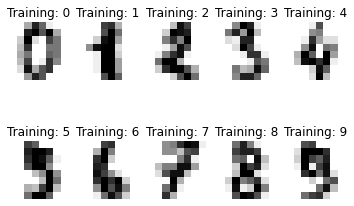

In [6]:
# _zip()_ Lo que hace es devolver un par ordenado de dos conjuntos de datos, 
# el orden es dado, la primera entrada va con la primera entrada del 
# segundo conjunto, la segunda del primero con la segunda del segundo, etc.
# i.e. zip(A, B) = ((A_índice_1, B_índice_1),(A_índice_2,B_índice_2), ...)
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title(f"Training: {label}")

Para la preparación de los datos, es necesario "aplanar" las dimensiones de la imagen para convertirlo en una matriz (datos, _target_)

In [7]:
n_samples = len(digits.images)
# Aqui el reshape lo que hace es, toma en número de imágenes que tenemos y crea 
# ese cantidad de filas, usando el valor -1, es dejarle a numpy que esa 
# dimensión tome las dimensiones que faltan, en este caso es 8 x 8 que eran el 
# tamaño de la matriz
data = digits.images.reshape((n_samples, -1))

In [8]:
data.shape

(1797, 64)

Creamo el clasificador que como se definió en el objetivo va a ser una Máquina de Soporte Vectorial

In [9]:
svm = svm.SVC(gamma=0.001)

Ahora pasamos a utilizar la primera mitad del conjunto de datos para entrenar la Máquina de Soporte Vectorial.

In [10]:
# // Genera una división entera
svm.fit(data[ :n_samples//2], digits.target[ :n_samples//2])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Predecimos las clases de la segunda mitad de nuestro conjunto de imágenes

In [11]:
predicted = svm.predict(data[n_samples//2 : ])

In [12]:
predicted.shape

(899,)

Imprimimos las métricas anteriormente explicadas.

In [13]:
print("Métricas de las predicciones hechas por el clasificador SVM: ")
print(metrics.classification_report(digits.target[n_samples//2 :], predicted))

Métricas de las predicciones hechas por el clasificador SVM: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



Generamos la matriz de confusión.

In [14]:
# La función center es solo para dar formato, toma el primer valor,
# que en este caso es 33, escribe el texto y lo rellena con espacios
# en blanco, aquí se ocupó center, pero existe rjust y ljust para
# alinear a la derecha e izquierda respectivamente
print("Matriz de confusión".center(33, ' '))
print(metrics.confusion_matrix(digits.target[n_samples//2 :], predicted))

       Matriz de confusión       
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


Ahora generamos la misma impresión anterior de los 10 primeras imágenes con su respectivo valor predicho por la SVM.

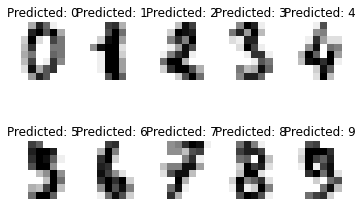

In [15]:
images_and_predictions = list(zip(digits.images[n_samples//2: ], predicted))

for index, (image, prediction) in enumerate(images_and_labels[ :10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title(f"Predicted: {prediction}")     

## Vamos a crear un diagrama de calor para visualizar de mejor manera la matriz de confusión

Vamos a apoyarnos de pandas para generar la matriz de confusión a partir de la función _crosstab_. Para lo anterior es necesario convertir nuestro columna de clases predichas y la columna target en _DataFrames_, cabe recordar que aquí se está tomando los _target_ de la segunda mitad de nuestro catálogo de imágenes.

In [16]:
df_predicted = pd.DataFrame(predicted)
df_expected = pd.DataFrame(digits.target[n_samples//2: ])
df_expected

,0
0,8
1,8
2,4
3,9
4,0
...,...
894,9
895,0
896,8
897,9


Juntamos en un solo _DataFrame_ los dos _DataFrame_ creados anteriormente.

In [17]:
df_final= df_predicted.copy(deep=True)
df_final['expected'] = df_expected
df_final.columns = ['predicted', 'expected']
df_final

,predicted,expected
0,8,8
1,8,8
2,4,4
3,9,9
4,0,0
...,...,...
894,9,9
895,0,0
896,8,8
897,9,9


Creamos la matríz de confusión.

In [20]:
# OJO. es sumamente importante pasar al crosstab primero los valores verdaderos 
# o actuales, esto ya que es el convenio de la matriz de confusión 
matriz_confusion = pd.crosstab( df_final.expected, df_final.predicted, rownames=['Actual'], colnames=['Predicción'])
matriz_confusion

Predicción,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,87,0,0,0,1,0,0,0,0,0
1,0,88,1,0,0,0,0,0,1,1
2,0,0,85,1,0,0,0,0,0,0
3,0,0,0,79,0,3,0,4,5,0
4,0,0,0,0,88,0,0,0,0,4
5,0,0,0,0,0,88,1,0,0,2
6,0,1,0,0,0,0,90,0,0,0
7,0,0,0,0,0,1,0,88,0,0
8,0,0,0,0,0,0,0,0,88,0


Crear el diagrama de calor.

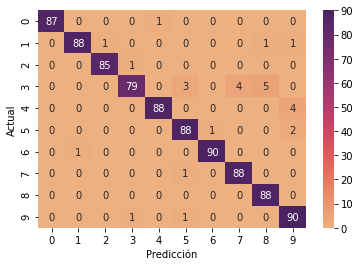

In [21]:
# Se utiliza el cmap de _flare_ ya que tiene varios valores de 0
# y quedamuy oscuro el diagrama de calor
sns.heatmap(matriz_confusion, annot=True, cmap='flare')
plt.show()